In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00


=== Base Circuit ===
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 524, '0 0': 500}


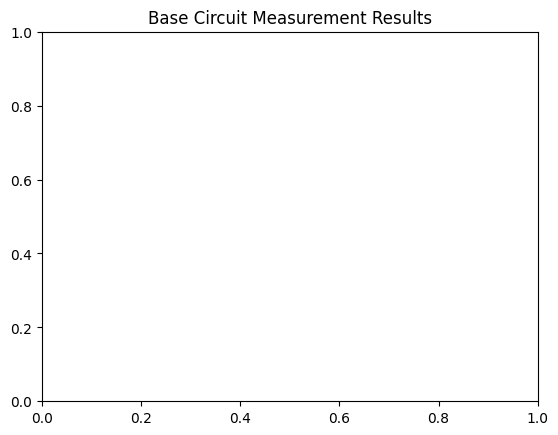


=== Task 1: Change Gate Order (Swap X and H) ===
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts (Swapped Order): {'1 0': 504, '0 0': 520}


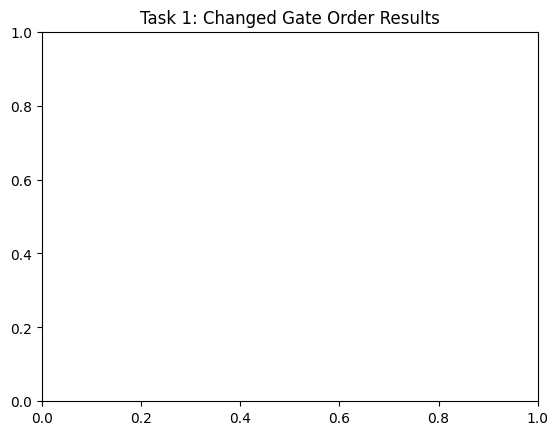


=== Task 2: Vary Rotation Angle (Rz) ===

Rotation Angle θ = 0.785 radians
Measurement Counts: {'1 0': 531, '0 0': 493}


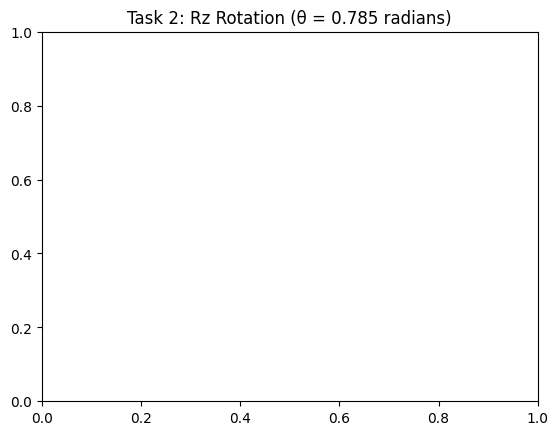


Rotation Angle θ = 1.571 radians
Measurement Counts: {'1 0': 500, '0 0': 524}


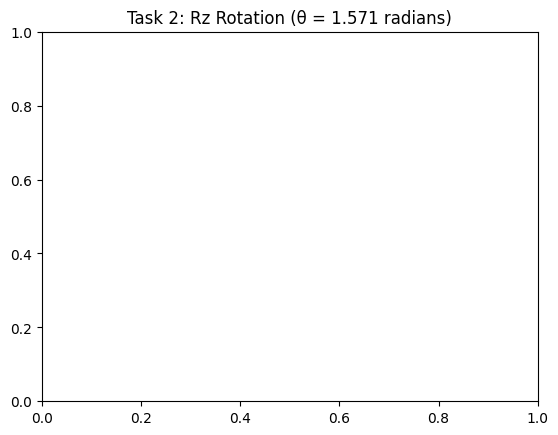


Rotation Angle θ = 3.142 radians
Measurement Counts: {'0 0': 522, '1 0': 502}


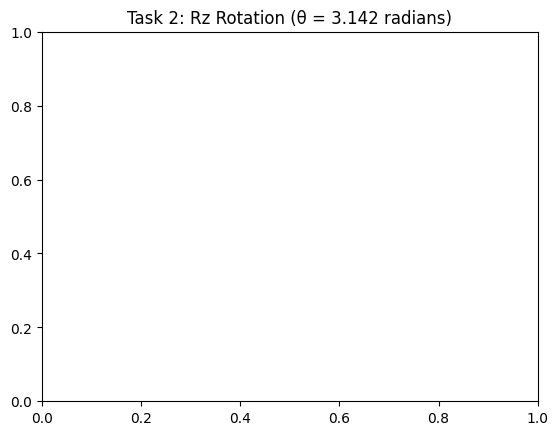


=== Task 3: Remove Hadamard Gate ===
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 
Measurement Counts (Without H): {'1 0': 1024}


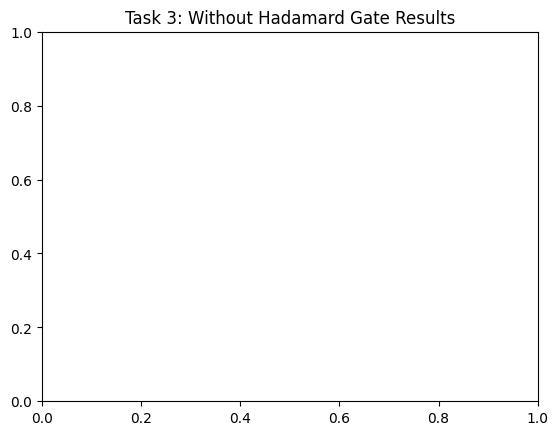

In [2]:
# ===============================================================
# Quantum Gates Exploration in Qiskit
# ===============================================================
# This notebook demonstrates how single-qubit gates affect quantum states.
# Students will explore:
#   1. Changing gate order
#   2. Varying rotation angles
#   3. Removing a gate
# ===============================================================

# ===========================
# Install Qiskit and Aer
# ===========================
!pip install qiskit qiskit-aer --quiet --upgrade

# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math

# Initialize simulator
sim = AerSimulator()


# ===============================================================
# Base Circuit
# ===============================================================
print("=== Base Circuit ===")

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# Apply sequence of single-qubit gates
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("Measurement Counts:", counts)
plot_histogram(counts)
plt.title("Base Circuit Measurement Results")
plt.show()


# ===============================================================
# 🧩 Student Task 1: Change Gate Order
# ===============================================================
print("\n=== Task 1: Change Gate Order (Swap X and H) ===")

# Create a new circuit with swapped gate order
qc_task1 = QuantumCircuit(1, 1)

# Swap order: Apply H first, then X
qc_task1.h(0)
qc_task1.x(0)
qc_task1.s(0)
qc_task1.t(0)
qc_task1.rz(0.5, 0)
qc_task1.measure_all()

print(qc_task1.draw())

compiled_task1 = transpile(qc_task1, sim)
result_task1 = sim.run(compiled_task1, shots=1024).result()
counts_task1 = result_task1.get_counts()

print("Measurement Counts (Swapped Order):", counts_task1)
plot_histogram(counts_task1)
plt.title("Task 1: Changed Gate Order Results")
plt.show()

# Observation:
# The order of gates affects the quantum state because quantum operations are NOT commutative.
# Swapping gates changes the resulting interference and thus the output probabilities.


# ===============================================================
# 🌀 Student Task 2: Vary Rotation Angle
# ===============================================================
print("\n=== Task 2: Vary Rotation Angle (Rz) ===")

angles = [math.pi/4, math.pi/2, math.pi]  # π/4, π/2, π
for theta in angles:
    qc_task2 = QuantumCircuit(1, 1)
    qc_task2.x(0)
    qc_task2.h(0)
    qc_task2.s(0)
    qc_task2.t(0)
    qc_task2.rz(theta, 0)  # variable rotation
    qc_task2.measure_all()

    compiled_task2 = transpile(qc_task2, sim)
    result_task2 = sim.run(compiled_task2, shots=1024).result()
    counts_task2 = result_task2.get_counts()

    print(f"\nRotation Angle θ = {round(theta, 3)} radians")
    print("Measurement Counts:", counts_task2)
    plot_histogram(counts_task2)
    plt.title(f"Task 2: Rz Rotation (θ = {round(theta, 3)} radians)")
    plt.show()

# Observation:
# Changing the rotation angle alters the phase of the quantum state,
# which can modify interference patterns and output probabilities.


# ===============================================================
# 🚫 Student Task 3: Remove a Gate (Remove Hadamard)
# ===============================================================
print("\n=== Task 3: Remove Hadamard Gate ===")

# Create circuit without the Hadamard gate
qc_task3 = QuantumCircuit(1, 1)
qc_task3.x(0)
# qc_task3.h(0)   <-- Removed
qc_task3.s(0)
qc_task3.t(0)
qc_task3.rz(0.5, 0)
qc_task3.measure_all()

print(qc_task3.draw())

compiled_task3 = transpile(qc_task3, sim)
result_task3 = sim.run(compiled_task3, shots=1024).result()
counts_task3 = result_task3.get_counts()

print("Measurement Counts (Without H):", counts_task3)
plot_histogram(counts_task3)
plt.title("Task 3: Without Hadamard Gate Results")
plt.show()

# Observation:
# The Hadamard gate introduces superposition.
# Removing it eliminates the 50-50 probability spread, resulting in a biased measurement outcome.
